<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>


# **Análisis de los Destinos Turísticos desde aeropuertos españoles** ✈️





<p>
<b>Profesor:</b> Gustavo Fontana Riera <br>
<b>Asignatura:</b> Análisis e Interpretación de Datos <br>
<b>Fecha de entrega:</b>  26/05/2025 <br>
<b>Alumnos Grupo 1B Equipo 1: <br>
    </b>- Erika Samara Alvares Angelim <br>
    </b>- Joel Cemeli Sánchez<br>
    </b>- Jose Garcia Diaz <br>
    </b>- Laila Tatiana Romero<br>
    </b>- Rocío Noriega Bustelo<br>
</p>


En esta sección vamos hacer el tratamiento del dataset `df_vuelos` con el objetivo de:

- Corregir registros duplicados y nulos en campos clave.
- Imputar datos faltantes (cuando sea válido) para no descartar vuelos completos.
- Preparar una estructura final que nos permita analizar los destinos más populares y su evolución.




Este proceso sigue la lógica empleada en la Parte I del informe, enfocándonos en la preparación de datos para visualización. <br>

## ✔️**Instalar las bibliotecas necesarias**


In [149]:
#Para esta actividad se importarán las siguientes librerías:

# Instalar librerías necesarias para el análisis de datos y la visualización
# Primero verifica si las librerías de Ciencias de Datos estan todas instaladas y si no, las instalan
import importlib
import subprocess
import sys

def install_if_missing(package_name, import_name=None):
    try:
        importlib.import_module(import_name or package_name)
        print(f"✅ {package_name} ya está instalado.")
    except ImportError:
        print(f"⬇️ Instalando {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# Lista de paquetes a verificar
packages = {
    "numpy": "numpy",
    "matplotlib": "matplotlib",
    "pandas": "pandas",
    "seaborn": "seaborn",
    "scikit-learn": "sklearn",
    "statsmodels": "statsmodels",
    "plotly.express": "plotly.express",
}
for pkg, import_name in packages.items():
    install_if_missing(pkg, import_name)
print("✅ Todas las librerías necesarias están instaladas.")


#Para esta actividad se importarán las siguientes librerías:
# Importación de librerías (Python)
import pandas as pd
from pandas import Period # Para manejar periodos de tiempo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para manejar fechas
import matplotlib.font_manager as font_manager # Para manejar fuentes
import seaborn as sns
import warnings
import json
from scipy.stats import linregress

import locale # para usar idioma local
from IPython.display import display # Asegurarse de importar display si se usa
import plotly.graph_objects as go # Necesitarás instalar plotly: !pip install plotly # Instalamos la librería para Sankey

import warnings # Biblioteca para manejar las advertencias en Python


print("\n--- ✅ Librerías Importadas con Exito ---")


✅ numpy ya está instalado.
✅ matplotlib ya está instalado.
✅ pandas ya está instalado.
✅ seaborn ya está instalado.
✅ scikit-learn ya está instalado.
✅ statsmodels ya está instalado.
✅ plotly.express ya está instalado.
✅ Todas las librerías necesarias están instaladas.

--- ✅ Librerías Importadas con Exito ---


## **Cargar el Dataset**

In [150]:
# Configuración ambiente de trabajo

warnings.filterwarnings('ignore') # Ocultar warnings

# Mostrar todas las columnas sin truncamiento
#pd.set_option('display.max_columns', None)       # Muestra todas las columnas
#pd.set_option('display.max_rows', None)          # Muestra todas las filas

# Configuración de estilo de visualización
sns.set_theme(style="ticks", palette="deep")

# Parámetros para las gráficas
default_figsize = (10, 6)


In [151]:
# Cargar CSVs (Importación en bruto (sin tratar tipos ni limpiar))
url_vuelos = 'https://raw.githubusercontent.com/InnocenceAllen/AENA_Info_Vuelos/master/infovuelos_sample.csv'

# Leer CSV directamente desde la URL
df_vuelos = pd.read_csv(url_vuelos, sep=';')

# --- Añadir comprobación inicial ---
print("Número de filas antes de limpiar fechas:", len(df_vuelos))

# Mostrar primeras filas para inspección
df_vuelos.head()

Número de filas antes de limpiar fechas: 39102


,flightNumber,plane,dep_date,dep_time,dep_airport_name,dep_airport_code,dep_terminal,dep_status,dep_weather_min,dep_weather_max,...,arr_airport_name,arr_airport_code,arr_terminal,arr_status,arr_weather_min,arr_weather_max,arr_weather_desc,arr_room,arr_belt,timestamp
0,HTY134,AWH,13/04/18,10:00,ALGECIRAS / HELIPUERTO,AEI,-,El vuelo ha despegado a las 10:03,9,16,...,CEUTA,JCU,-,El vuelo ha aterrizado a las 10:12,11,17,Lluvia,-,-,2018-04-13 10:33:45
1,HTY110,AWH,13/04/18,14:15,CEUTA,JCU,-,Llegada prevista a las 14:15,11,17,...,ALGECIRAS / HELIPUERTO,AEI,-,Salida prevista a las 14:35,9,16,Chubascos dispersos,-,-,2018-04-13 10:33:47
2,HTY112,AWH,13/04/18,15:05,ALGECIRAS / HELIPUERTO,AEI,-,Salida prevista a las 15:10,9,16,...,CEUTA,JCU,-,Llegada prevista a las 15:15,11,17,Lluvia,-,-,2018-04-13 10:33:48
3,HTY114,AWH,13/04/18,15:35,ALGECIRAS / HELIPUERTO,AEI,-,Salida prevista a las 15:40,9,16,...,CEUTA,JCU,-,Llegada prevista a las 15:45,11,17,Lluvia,-,-,2018-04-13 10:33:50
4,HTY138,AWH,13/04/18,18:45,ALGECIRAS / HELIPUERTO,AEI,-,Salida prevista a las 18:50,9,16,...,CEUTA,JCU,-,Llegada prevista a las 18:55,11,17,Lluvia,-,-,2018-04-13 10:33:51


## **Explique el problema a resolver.**
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

### 📌 **Definición de un problema estadístico: modelización y propuesta de soluciones**

En esta sección se trabaja con el dataset [infovuelos_sample.csv](https://github.com/InnocenceAllen/AENA_Info_Vuelos_V2), el cual contiene información sobre vuelos diários que comprenden el periodo de 13/04/2018 a 15/04/2018 en los principales aeropuertos de España.

El dataset ha sido obtenido del catálogo de datos del curso y se encuentra almacenados en Github.

El objetivo principal es identificar cuáles son los destinos turísticos más populares, en términos de número de vuelos recibidos, y si su volumen muestra una tendencia creciente o decreciente durante el periodo observado. <br>

**Diccionário de Datos:**

| Campo               | Descripción                              | Tipo de dato | Muestra                   |
|---------------------|------------------------------------------|--------------|---------------------------|
| flightNumber        | Número de vuelo                          | String       | AEA7232                   |
| company             | Compañía aérea                           | String       | IBERIA                    |
| plane               | Nombre del avión                         | String       | ATR-72                    |
| dep_date            | Fecha de salida                          | Datetime     | 13/04/18                  |
| dep_time            | Hora de salida                           | Datetime     | 06:30                     |
| dep_airport_name    | Nombre del aeropuerto de origen          | String       | A Coruña                  |
| dep_airport_code    | Código del aeropuerto de origen          | String       | LCG                       |
| dep_terminal        | Terminal de salida                       | String       | 1                         |
| dep_status          | Estado de salida                         | String       | Salida prevista a las 07:00 |
| dep_weather_min     | Temperatura mínima en origen             | Integer      | 10                        |
| dep_weather_max     | Temperatura máxima en origen             | Integer      | 15                        |
| dep_weather_desc    | Descripción del clima en origen          | String       | Nubosidad variable        |
| dep_counter         | Mostrador de facturación                 | Integer      | 6                         |
| dep_door            | Puerta de embarque                       | Integer      | 7                         |
| arr_date            | Fecha de llegada                         | Datetime     | 13/04/18                  |
| arr_time            | Hora de llegada                          | Datetime     | 08:40                     |
| arr_airport_name    | Nombre del aeropuerto de destino         | String       | Barcelona-El Prat         |
| arr_terminal        | Terminal de destino                      | String       | T1                        |
| arr_status          | Estado de llegada                        | String       | Llegada prevista a las 08:40 |
| arr_weather_min     | Temperatura mínima en destino            | Integer      | 12                        |
| arr_weather_max     | Temperatura máxima en destino            | Integer      | 17                        |
| arr_weather_desc    | Descripción del clima en destino         | String       | Lluvia débil             |
| arr_room            | Sala de recepción                        | String       | T1_G                      |
| arr_belt            | Cinta de equipajes                       | Integer      | 7                         |
| timestamp           | Tiempo de captura                        | Datetime     | 2018-04-12 23:42:08       |


Para llevar al cabo esta actividad se ejecutará el preprocesamienot de datos, realizando limpieza, tratamiendo de datos, creación de nuevas columnas, separación de los datos de vuelos nacionales e internacionales:
- Limpieza de datos con valores faltantes.
- Detección y tratamiento de registros duplicados.
- Preparación de campos clave como fechas y duración de vuelo.
- Generación de métricas por destino.
- Visualización para identificar popularidad y tendencia.

### 📌 **Tipo de problema (justifique):**


### 👉 **Utilidad de su posible solución:**
- Este tipo de visualización puede ser útil para analizar flujos turísticos y planificar estrategias logísticas o de promoción turística.

---





## **Caracterización del Dataset**

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [152]:
print("Número de filas dataframe df_vuelos:", len(df_vuelos))
df_vuelos.info()

Número de filas dataframe df_vuelos: 39102
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   flightNumber      39102 non-null  object
 1   plane             39102 non-null  object
 2   dep_date          39102 non-null  object
 3   dep_time          39102 non-null  object
 4   dep_airport_name  39102 non-null  object
 5   dep_airport_code  39102 non-null  object
 6   dep_terminal      39102 non-null  object
 7   dep_status        39102 non-null  object
 8   dep_weather_min   39102 non-null  object
 9   dep_weather_max   39102 non-null  object
 10  dep_weather_desc  39102 non-null  object
 11  dep_counter       39102 non-null  object
 12  dep_door          39102 non-null  object
 13  arr_date          39102 non-null  object
 14  arr_time          39102 non-null  object
 15  arr_airport_name  39102 non-null  object
 16  arr_airport_cod

In [153]:
# Estadísticas descriptivas
df_vuelos.describe(include='all')

,flightNumber,plane,dep_date,dep_time,dep_airport_name,dep_airport_code,dep_terminal,dep_status,dep_weather_min,dep_weather_max,...,arr_airport_name,arr_airport_code,arr_terminal,arr_status,arr_weather_min,arr_weather_max,arr_weather_desc,arr_room,arr_belt,timestamp
count,39102,39102,39102,39102,39102,39102,39102,39102,39102,39102,...,39102,39102,39102,39102,39102,39102,39102,39102,39102,39102
unique,3787,59,6,235,41,41,12,1822,16,17,...,275,275,13,1828,16,16,14,29,75,5745
top,IBB650,BOEING 737-800 WINGLETS,15/04/18,-,MADRID-BARAJAS ADOLFO SUÁREZ,MAD,1,-,17,17,...,MADRID-BARAJAS ADOLFO SUÁREZ,MAD,-,-,-,-,-,-,-,2018-04-15 05:16:39
freq,87,9505,14386,861,4083,4083,14897,868,6863,7754,...,3606,3606,19076,12927,12920,12920,12920,12920,12920,37


In [154]:
# Comprobar valores únicos
print("Valores únicos antes de limpiar fechas:")
print(df_vuelos.nunique())

Valores únicos antes de limpiar fechas:
flightNumber        3787
plane                 59
dep_date               6
dep_time             235
dep_airport_name      41
dep_airport_code      41
dep_terminal          12
dep_status          1822
dep_weather_min       16
dep_weather_max       17
dep_weather_desc      14
dep_counter          719
dep_door             410
arr_date               5
arr_time             215
arr_airport_name     275
arr_airport_code     275
arr_terminal          13
arr_status          1828
arr_weather_min       16
arr_weather_max       16
arr_weather_desc      14
arr_room              29
arr_belt              75
timestamp           5745
dtype: int64


> ## **💡 Principales hallazgos encontrados**
> - Al consultar las informaciones sobre la estructura del conjunto de datos, se observa que no hay valores faltantes, devido a que los datos que faltaban han sido rellenados con el caracter "-" en varias columnas. Además, todas las columnas poseen el mismo tipo de dato "object". Las columnas que deberían estar como numéricas o como fecha/hora deberán ser tratadas posteriormente.

> - En el mismo fichero CSV estan los registros de los **vuelos nacionales (llegadas y partidas)** y de los **vuelos internacionales (llegadas y partidas)**.
> - Lo que diferen los vuelos nacionales de los internacionales es que para los vuelos internacionales con partida desde aeropuertos españoles, solo hay registro de la fecha/hora de partida, no viene rellenado la fecha/hora de llegada en el destino, del mismo modo, para los vuelos internacionales con destino hacía España, solo hay registro de fecha/hora de llegada, no hay registro de fecha/hora dde partida del país de origen, siendo así, para afrontar esta situación, los datos para el análisis han sido separados por vuelos nacionales y internacionales, además ha sido la mejor estrategia encontrada para hacer la limpieza de los datos (manejar valores faltantes, duplicados, etcs).

## 🧹 **Preprocesamiento y Limpieza de Datos**

##### **Conversión de tipos de datos para numérico y para fecha/hora y creación de nuevas columnas.**

In [155]:
# =====================================================================
# Crear nuevas columnas combinadas de fecha y hora (PRIMER PASO)
# =====================================================================

# Convertimos a string y manejamos valores nulos
for col in ['dep_date', 'dep_time', 'arr_date', 'arr_time']:
    df_vuelos[col] = df_vuelos[col].fillna('').astype(str)

# Crear nuevas columnas combinando fecha y hora
df_vuelos['dep_date_time'] = pd.to_datetime(df_vuelos['dep_date'], format='%d/%m/%y', errors='coerce').dt.strftime('%Y-%m-%d') + ' ' + df_vuelos['dep_time']
df_vuelos['arr_date_time'] = pd.to_datetime(df_vuelos['arr_date'], format='%d/%m/%y', errors='coerce').dt.strftime('%Y-%m-%d') + ' ' + df_vuelos['arr_time']

# Convertir las nuevas columnas a datetime
df_vuelos['dep_date_time'] = pd.to_datetime(df_vuelos['dep_date_time'], errors='coerce')
df_vuelos['arr_date_time'] = pd.to_datetime(df_vuelos['arr_date_time'], errors='coerce')

# =====================================================================
# Crear columnas de tiempo numéricas y calcular duración (NUEVO)
# =====================================================================
def time_to_int(time_str):
    try:
        hours, minutes = map(int, time_str.split(':'))
        return hours * 100 + minutes
    except:
        return pd.NA

# Calcular duración usando datetime (método recomendado)
df_vuelos['duracion_vuelo'] = (df_vuelos['arr_date_time'] - df_vuelos['dep_date_time']).dt.total_seconds() / 60  # en minutos


# =====================================================================
# Convertir tipos de columnas originales
# =====================================================================
dtype_mapping = {
    # Columnas originales
    'flightNumber': 'object',
    'plane': 'object',
    'dep_airport_name': 'object',
    'dep_airport_code': 'object',
    'dep_terminal': 'object',
    'dep_status': 'object',
    'dep_weather_desc': 'object',
    'arr_airport_name': 'object',
    'arr_airport_code': 'object',
    'arr_terminal': 'object',
    'arr_status': 'object',
    'arr_weather_desc': 'object',
    'arr_room': 'object',

    # Columnas numéricas
    'dep_weather_min': 'Int64',
    'dep_weather_max': 'Int64',
    'dep_counter': 'Int64',
    'dep_door': 'Int64',
    'arr_weather_min': 'Int64',
    'arr_weather_max': 'Int64',
    'arr_belt': 'Int64',

    # Columnas datetime originales
    'dep_date': 'datetime64[ns]',
    #'dep_time': 'datetime64[ns]',
    'arr_date': 'datetime64[ns]',
    #'arr_time': 'datetime64[ns]',
    'timestamp': 'datetime64[ns]',

    # NUEVAS COLUMNAS (IMPORTANTE AÑADIRLAS)
    'dep_date_time': 'datetime64[ns]',
    'arr_date_time': 'datetime64[ns]',

    # Añadir nuevas columnas al mapeo
    'duracion_vuelo': 'float64'
}

# Conversión numérica mejorada
numeric_cols = ['dep_weather_min', 'dep_weather_max', 'dep_counter', 'dep_door',
                'arr_weather_min', 'arr_weather_max', 'arr_belt']

for col in numeric_cols:
    df_vuelos[col] = pd.to_numeric(
        df_vuelos[col].replace(['-', ' ', 'ND', 'nan', ''], pd.NA),
        errors='coerce'
    ).astype('Int64')

# Conversión de fechas originales
date_cols = ['dep_date', 'arr_date']
for col in date_cols:
    df_vuelos[col] = pd.to_datetime(df_vuelos[col], errors='coerce')

# Conversión de timestamp
df_vuelos['timestamp'] = pd.to_datetime(df_vuelos['timestamp'], errors='coerce')

# Conversión a string
string_cols = [col for col in dtype_mapping if dtype_mapping[col] == 'string']
for col in string_cols:
    df_vuelos[col] = df_vuelos[col].astype('string')

# Aseguramos la conversión de las nuevas columnas (redundante pero seguro)
df_vuelos['dep_date_time'] = df_vuelos['dep_date_time'].astype('datetime64[ns]')
df_vuelos['arr_date_time'] = df_vuelos['arr_date_time'].astype('datetime64[ns]')


# =====================================================================
# 4. Verificación final mejorada
# =====================================================================
print("\Información dataframe df_vuelos:")
print(df_vuelos.dtypes)

print("\nNúmero de filas después de limpiar fechas:", len(df_vuelos))

print("Forma del dataframe:", df_vuelos.shape)


\Información dataframe df_vuelos:
flightNumber                object
plane                       object
dep_date            datetime64[ns]
dep_time                    object
dep_airport_name            object
dep_airport_code            object
dep_terminal                object
dep_status                  object
dep_weather_min              Int64
dep_weather_max              Int64
dep_weather_desc            object
dep_counter                  Int64
dep_door                     Int64
arr_date            datetime64[ns]
arr_time                    object
arr_airport_name            object
arr_airport_code            object
arr_terminal                object
arr_status                  object
arr_weather_min              Int64
arr_weather_max              Int64
arr_weather_desc            object
arr_room                    object
arr_belt                     Int64
timestamp           datetime64[ns]
dep_date_time       datetime64[ns]
arr_date_time       datetime64[ns]
duracion_vuelo       

In [156]:
# Comprobar valores únicos
print("Valores únicos después de limpiar fechas:")
print(df_vuelos.nunique())

Valores únicos después de limpiar fechas:
flightNumber        3787
plane                 59
dep_date               5
dep_time             235
dep_airport_name      41
dep_airport_code      41
dep_terminal          12
dep_status          1822
dep_weather_min       15
dep_weather_max       16
dep_weather_desc      14
dep_counter            1
dep_door              34
arr_date               4
arr_time             215
arr_airport_name     275
arr_airport_code     275
arr_terminal          13
arr_status          1828
arr_weather_min       15
arr_weather_max       15
arr_weather_desc      14
arr_room              29
arr_belt              40
timestamp           5745
dep_date_time        760
arr_date_time        688
duracion_vuelo        58
dtype: int64


In [157]:
# Despues de la conversión de los tipos de datos, verificar si hay valores nulos o faltantes en todas las columnas

print("\nValores nulos por columna después de convertir los tipos de datos:")
print(df_vuelos.isnull().sum())

print("\nPorcentaje de valores nulos por columna:")
print((df_vuelos.isnull().mean() * 100).round(2))


Valores nulos por columna después de convertir los tipos de datos:
flightNumber            0
plane                   0
dep_date              861
dep_time                0
dep_airport_name        0
dep_airport_code        0
dep_terminal            0
dep_status              0
dep_weather_min       861
dep_weather_max       861
dep_weather_desc        0
dep_counter         39092
dep_door            21093
arr_date            12920
arr_time                0
arr_airport_name        0
arr_airport_code        0
arr_terminal            0
arr_status              0
arr_weather_min     12920
arr_weather_max     12920
arr_weather_desc        0
arr_room                0
arr_belt            17248
timestamp               0
dep_date_time         861
arr_date_time       12920
duracion_vuelo      13779
dtype: int64

Porcentaje de valores nulos por columna:
flightNumber         0.00
plane                0.00
dep_date             2.20
dep_time             0.00
dep_airport_name     0.00
dep_airport_code   

### **Separar los datos de vuelos nacionales e internacionales**

In [158]:
#------------------------------------------------------------------------------
# Vuelos Internacionales
#------------------------------------------------------------------------------

# Vuelos de salida internacionales (solamente con fecha/hora de salida informada)
vuelos_salida = df_vuelos[
    df_vuelos['dep_date_time'].notnull() & df_vuelos['arr_date_time'].isnull()
]
print("Número de vuelos de salida internacionales:", len(vuelos_salida))

# Vuelos de llegada internacionales (solamente con fecha/hora de llegada informada)
vuelos_llegada = df_vuelos[
    df_vuelos['arr_date_time'].notnull() & df_vuelos['dep_date_time'].isnull()
]
print("Número de vuelos de llegada internacionales:", len(vuelos_llegada))



#------------------------------------------------------------------------------
# Vuelos Nacionales
#------------------------------------------------------------------------------

# Vuelos nacionales (con fecha/hora de llegada y salida informados)
vuelos_nacionales = df_vuelos[
    df_vuelos['dep_date_time'].notnull() & df_vuelos['arr_date_time'].notnull()
]
print("Número de vuelos nacionales:", len(vuelos_nacionales))

Número de vuelos de salida internacionales: 12918
Número de vuelos de llegada internacionales: 859
Número de vuelos nacionales: 25323


### **Tratar valores duplicados**


#### **Tratar valores duplicados exactos (líneas identicas)**


##### Consultar valores duplicados exactos

In [159]:
# Visualizar las filas duplicadas exactas en el DataFrame

'''
Si los 24 duplicados son registros idénticos en todas
las columnas (incluyendo timestamp), probablemente sean entradas reales
duplicadas que puedes eliminar. Si el timestamp difiere, deberías verificar
si son actualizaciones válidas del mismo vuelo o no.
'''

# Obtener todas las filas duplicadas (incluyendo la primera ocurrencia)
duplicados_vuelos_salida = vuelos_salida[vuelos_salida.duplicated(keep=False)]
duplicados_vuelos_llegada = vuelos_llegada[vuelos_llegada.duplicated(keep=False)]
duplicados_vuelos_nacionales = vuelos_nacionales[vuelos_nacionales.duplicated(keep=False)]

# Ordenar para agrupar los duplicados
duplicados_ordenados_vuelos_salida = duplicados_vuelos_salida.sort_values(by=vuelos_salida.columns.to_list())
duplicados_ordenados_vuelos_llegada = duplicados_vuelos_llegada.sort_values(by=vuelos_llegada.columns.to_list())
duplicados_ordenados_vuelos_nacionales = duplicados_vuelos_nacionales.sort_values(by=vuelos_nacionales.columns.to_list())


# Mostrar todos los duplicados: Vuelos de Salida
print(f"Total de filas duplicadas (Vuelos de Salida): {len(duplicados_ordenados_vuelos_salida)}")
# Mostrar todos los duplicados: Vuelos de llegada
print(f"Total de filas duplicadas (Vuelos de Llegada): {len(duplicados_ordenados_vuelos_llegada)}")
# Mostrar todos los duplicados: Vuelos Nacionales
print(f"Total de filas duplicadas (Vuelos Nacionales): {len(duplicados_ordenados_vuelos_nacionales)}")


# Comprobar valores duplicados
print(f"Valores duplicados (Vuelos de Salida): {vuelos_salida.duplicated().sum()}")
print(f"Valores duplicados (Vuelos de Llegada): {vuelos_llegada.duplicated().sum()}")
print(f"Valores duplicados (Vuelos Nacionales): {vuelos_nacionales.duplicated().sum()}")


Total de filas duplicadas (Vuelos de Salida): 0
Total de filas duplicadas (Vuelos de Llegada): 0
Total de filas duplicadas (Vuelos Nacionales): 48
Valores duplicados (Vuelos de Salida): 0
Valores duplicados (Vuelos de Llegada): 0
Valores duplicados (Vuelos Nacionales): 24


##### Eliminar valores duplicados exactos (líneas identicas en TODAS las columnas)

In [160]:
# Eliminamos duplicados exactos (esto elimina las filas que son idénticas en TODAS las columnas)

#-----------------------------------------------------------------------------
# Vuelos Internacionales
#-----------------------------------------------------------------------------

vuelos_llegada = vuelos_llegada.drop_duplicates()
print("Filas originales", vuelos_llegada.shape)

vuelos_salida = vuelos_salida.drop_duplicates()
print("Filas originales", vuelos_salida.shape)

#-----------------------------------------------------------------------------
# Vuelos Nacionales
#-----------------------------------------------------------------------------

vuelos_nacionales = vuelos_nacionales.drop_duplicates()
print("Filas originales", vuelos_nacionales.shape)


Filas originales (859, 28)
Filas originales (12918, 28)
Filas originales (25299, 28)


#### **Tratar valores duplicados combinando columnas clave**


##### Consultar duplicado en columnas específicas (combinación de columnas clave)

In [161]:
# Verificar duplicados en columnas específicas (por ejemplo, combinación vuelo + fecha/hora):

# Definir columnas clave para identificar vuelos únicos
columnas_clave = [
     'flightNumber',
     'plane',
     'dep_airport_name',
     'dep_airport_code',
     'dep_terminal',
     'dep_weather_desc',
     'arr_airport_name',
     'arr_airport_code',
     'arr_terminal',
     'arr_weather_desc',
     'dep_date_time',  # fecha y hora de salida
     'arr_date_time'   # fecha y hora de llegada
 ]

# Encontrar duplicados basados en estas columnas
duplicados_parciales_vuelos_salida = vuelos_salida[vuelos_salida.duplicated(subset=columnas_clave, keep=False)]
duplicados_parciales_vuelos_llegada = vuelos_llegada[vuelos_llegada.duplicated(subset=columnas_clave, keep=False)]
duplicados_parciales_vuelos_nacionales = vuelos_llegada[vuelos_llegada.duplicated(subset=columnas_clave, keep=False)]


print("Vuelos Internacionalees Salida - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_salida:", duplicados_parciales_vuelos_salida.shape)
print("Vuelos Internacionales LLegada - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_llegada:", duplicados_parciales_vuelos_llegada.shape)
print("Vuelos Nacionales - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_nacionales:", duplicados_parciales_vuelos_nacionales.shape)


Vuelos Internacionalees Salida - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_salida: (11241, 28)
Vuelos Internacionales LLegada - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_llegada: (805, 28)
Vuelos Nacionales - Total de duplicados basados en columnas claves - duplicados_parciales_vuelos_nacionales: (805, 28)


In [162]:
# Mostrar ordenados por vuelo y fecha
print("\nVuelos Internacionales de Salida - Duplicados en columnas clave:")
duplicados_parciales_vuelos_salida.sort_values(by=columnas_clave).head(4)
# display(duplicados_parciales_vuelos_salida.sort_values(by=columnas_clave))



Vuelos Internacionales de Salida - Duplicados en columnas clave:


,flightNumber,plane,dep_date,dep_time,dep_airport_name,dep_airport_code,dep_terminal,dep_status,dep_weather_min,dep_weather_max,...,arr_status,arr_weather_min,arr_weather_max,arr_weather_desc,arr_room,arr_belt,timestamp,dep_date_time,arr_date_time,duracion_vuelo
10611,AEA1005,BOEING 737-800 WINGLETS,2018-04-14,06:10,VALENCIA,VLC,1,Salida prevista a las 06:10,10,18,...,-,<NA>,<NA>,-,-,<NA>,2018-04-14 01:19:29,2018-04-14 06:10:00,NaT,NaN
11217,AEA1005,BOEING 737-800 WINGLETS,2018-04-14,06:10,VALENCIA,VLC,1,Salida prevista a las 06:10,10,18,...,-,<NA>,<NA>,-,-,<NA>,2018-04-14 02:20:27,2018-04-14 06:10:00,NaT,NaN
11801,AEA1005,BOEING 737-800 WINGLETS,2018-04-14,06:10,VALENCIA,VLC,1,Salida prevista a las 06:10,10,18,...,-,<NA>,<NA>,-,-,<NA>,2018-04-14 03:21:36,2018-04-14 06:10:00,NaT,NaN
12403,AEA1005,BOEING 737-800 WINGLETS,2018-04-14,06:10,VALENCIA,VLC,1,Salida prevista a las 06:10,10,18,...,-,<NA>,<NA>,-,-,<NA>,2018-04-14 04:22:53,2018-04-14 06:10:00,NaT,NaN


In [163]:
print("\nVuelos Internacionales de Llegada - Duplicados en columnas clave:")
duplicados_parciales_vuelos_llegada.sort_values(by=columnas_clave).head(4)
# display(duplicados_parciales_vuelos_llegada.sort_values(by=columnas_clave))



Vuelos Internacionales de Llegada - Duplicados en columnas clave:


,flightNumber,plane,dep_date,dep_time,dep_airport_name,dep_airport_code,dep_terminal,dep_status,dep_weather_min,dep_weather_max,...,arr_status,arr_weather_min,arr_weather_max,arr_weather_desc,arr_room,arr_belt,timestamp,dep_date_time,arr_date_time,duracion_vuelo
2294,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 12:23:37,NaT,2018-04-13 17:25:00,NaN
3041,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 12:56:55,NaT,2018-04-13 17:25:00,NaN
3723,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 13:30:53,NaT,2018-04-13 17:25:00,NaN
5160,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 14:48:36,NaT,2018-04-13 17:25:00,NaN


In [164]:
print("\nVuelos Nacionales de Salida y Llegada - Duplicados en columnas clave:")
duplicados_parciales_vuelos_nacionales.sort_values(by=columnas_clave).head(4)
# display(duplicados_parciales_vuelos_nacionales.sort_values(by=columnas_clave))


Vuelos Nacionales de Salida y Llegada - Duplicados en columnas clave:


,flightNumber,plane,dep_date,dep_time,dep_airport_name,dep_airport_code,dep_terminal,dep_status,dep_weather_min,dep_weather_max,...,arr_status,arr_weather_min,arr_weather_max,arr_weather_desc,arr_room,arr_belt,timestamp,dep_date_time,arr_date_time,duracion_vuelo
2294,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 12:23:37,NaT,2018-04-13 17:25:00,NaN
3041,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 12:56:55,NaT,2018-04-13 17:25:00,NaN
3723,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 13:30:53,NaT,2018-04-13 17:25:00,NaN
5160,ANE2003,BOMBARDIER CRJ-1000,NaT,-,CASTELLÓN,CDT,-,-,<NA>,<NA>,...,Llegada prevista a las 17:25,8,17,Chubascos dispersos,B,5,2018-04-13 14:48:36,NaT,2018-04-13 17:25:00,NaN


##### Eliminación de duplicados conservando información útil
Filtrado y deduplicación inteligente basado en un conjunto de columnas
Se elimina del filtro de duplicados el timestamp

In [165]:
# Filtrado y deduplicación inteligente – Eliminación de duplicados conservando información útil

# Ordenamos por timestamp descendente para conservar el registro más reciente
duplicados_parciales_vuelos_salida = vuelos_salida.sort_values(by='timestamp', ascending=False)
duplicados_parciales_vuelos_llegada = vuelos_llegada.sort_values(by='timestamp', ascending=False)
duplicados_parciales_vuelos_nacionales = vuelos_nacionales.sort_values(by='timestamp', ascending=False)

# Eliminamos duplicados basados en las columnas únicas definidas (incluyendo fecha/hora)
# 'keep='first'' conservará la primera fila de cada grupo de "duplicados"
# En este caso, serán registros con la misma combinación de las columnas listadas.
# Como ordenamos por timestamp descendente, 'first' será el registro más reciente
# para esa combinación exacta de columnas únicas (incluyendo fecha/hora).
# Si hay múltiples registros para el MISMO vuelo en la MISMA fecha/hora (lo cual no debería pasar),
# esto conservará el más reciente según el timestamp de registro.

# Vuelos Internacionales Salida
df_vuelos_salida_deduplicados = duplicados_parciales_vuelos_salida.drop_duplicates(subset=columnas_clave, keep='first')
print("\nEstadística proceso de deduplicación del dataset:")
print("1. vuelos_salida original (Todas las líneas):", vuelos_salida.shape)
print("2. Filas después de deduplicar: df__vuelos_salida_deduplicados:", df_vuelos_salida_deduplicados.shape)

# Vuelos Internacionales Llegada
df_vuelos_llegada_deduplicados = duplicados_parciales_vuelos_llegada.drop_duplicates(subset=columnas_clave, keep='first')
print("\nEstadística proceso de deduplicación del dataset:")
print("1. vuelos_llegada original (Todas las líneas):", vuelos_llegada.shape)
print("2. Filas después de deduplicar: df__vuelos_llegada_deduplicados:", df_vuelos_llegada_deduplicados.shape)

# Vuelos Nacionales
df_vuelos_nacionales_deduplicados = duplicados_parciales_vuelos_nacionales.drop_duplicates(subset=columnas_clave, keep='first')
print("\nEstadística proceso de deduplicación del dataset:")
print("1. vuelos_nacionales original (Todas las líneas):", vuelos_nacionales.shape)
print("2. Filas después de deduplicar: df__vuelos_nacionales_deduplicados:", df_vuelos_nacionales_deduplicados.shape)



Estadística proceso de deduplicación del dataset:
1. vuelos_salida original (Todas las líneas): (12918, 28)
2. Filas después de deduplicar: df__vuelos_salida_deduplicados: (4265, 28)

Estadística proceso de deduplicación del dataset:
1. vuelos_llegada original (Todas las líneas): (859, 28)
2. Filas después de deduplicar: df__vuelos_llegada_deduplicados: (209, 28)

Estadística proceso de deduplicación del dataset:
1. vuelos_nacionales original (Todas las líneas): (25299, 28)
2. Filas después de deduplicar: df__vuelos_nacionales_deduplicados: (5850, 28)


In [166]:
# Verificar valores nulos despues de la eliminación de duplicados

# Vuelos Internacionales de Salida
print("\nVuelos Internacionales de Salida - Valores nulos por columna después de eliminar duplicados:")
df_vuelos_salida_deduplicados.isnull().sum()


Vuelos Internacionales de Salida - Valores nulos por columna después de eliminar duplicados:


,0
flightNumber,0
plane,0
dep_date,0
dep_time,0
dep_airport_name,0
dep_airport_code,0
dep_terminal,0
dep_status,0
dep_weather_min,0
dep_weather_max,0


In [167]:
# Verificar valores nulos despues de la eliminación de duplicados

# Vuelos Internacionales de Legada
print("\nVuelos Internacionales de Legada - Valores nulos por columna después de eliminar duplicados:")
df_vuelos_llegada_deduplicados.isnull().sum()


Vuelos Internacionales de Legada - Valores nulos por columna después de eliminar duplicados:


,0
flightNumber,0
plane,0
dep_date,209
dep_time,0
dep_airport_name,0
dep_airport_code,0
dep_terminal,0
dep_status,0
dep_weather_min,209
dep_weather_max,209


In [168]:
# Verificar valores nulos despues de la eliminación de duplicados

# Vuelos Nacionales
print("\nVuelos Nacionales - Valores nulos por columna después de eliminar duplicados:")
df_vuelos_nacionales_deduplicados.isnull().sum()


Vuelos Nacionales - Valores nulos por columna después de eliminar duplicados:


,0
flightNumber,0
plane,0
dep_date,0
dep_time,0
dep_airport_name,0
dep_airport_code,0
dep_terminal,0
dep_status,0
dep_weather_min,0
dep_weather_max,0


### **Tratar valores faltantes**
Imputación estratégica de fechas faltantes:
- Busca vuelos que poseen todos los campos de fechas de salida y llegada informados.
- Una vez encontrado, usa estos registros de vuelos de referencia para actualizar los vuelos identicos que **no** poseen las fechas informadas. De esa manera se evita eliminar registros de vuelos validos.

In [169]:
# Recuperar fechas de referencia por vuelo y ruta

# Definimos columnas clave para identificar un vuelo tipo
columnas_referencia = [
    'flightNumber', 'plane', 'dep_airport_name', 'dep_airport_code',
    'dep_terminal', 'dep_weather_desc', 'arr_airport_name',
    'arr_airport_code', 'arr_terminal', 'arr_weather_desc'
]

# Filtramos registros que sí tienen fecha/hora
df_vuelos_salida_completos = df_vuelos_salida_deduplicados.dropna(subset=['dep_date_time', 'arr_date_time'])
df_vuelos_llegada_completos = df_vuelos_llegada_deduplicados.dropna(subset=['dep_date_time', 'arr_date_time'])
df_vuelos_nacionales_completos = df_vuelos_nacionales_deduplicados.dropna(subset=['dep_date_time', 'arr_date_time'])

#-------------------------------------------------------------------------------
# Vuelos Internacionales Salida
#-------------------------------------------------------------------------------
# Generamos un dataset de referencia con una entrada por combinación clave
df_vuelos_salida_referencia = df_vuelos_salida_completos.drop_duplicates(subset=columnas_referencia, keep='first')
columnas_actualizables = ['dep_date', 'arr_date', 'dep_date_time', 'arr_date_time']
df_vuelos_salida_referencia = df_vuelos_salida_referencia[columnas_referencia + columnas_actualizables]
# Merge con df_vuelos
df_vuelos_salida_datetime_recuperados = df_vuelos_salida_deduplicados.merge(df_vuelos_salida_referencia, on=columnas_referencia, how='left', suffixes=('', '_ref'))
# Completamos campos nulos con los de referencia
for col in columnas_actualizables:
    df_vuelos_salida_datetime_recuperados[col] = df_vuelos_salida_datetime_recuperados[col].fillna(df_vuelos_salida_datetime_recuperados[f'{col}_ref'])

#-------------------------------------------------------------------------------
# Vuelos Internacionales Legada
#-------------------------------------------------------------------------------
# Generamos un dataset de referencia con una entrada por combinación clave
df_vuelos_llegada_referencia = df_vuelos_llegada_completos.drop_duplicates(subset=columnas_referencia, keep='first')
columnas_actualizables = ['dep_date', 'arr_date', 'dep_date_time', 'arr_date_time']
df_vuelos_llegada_referencia = df_vuelos_llegada_referencia[columnas_referencia + columnas_actualizables]
# Merge con df_vuelos
df_vuelos_llegada_datetime_recuperados = df_vuelos_llegada_deduplicados.merge(df_vuelos_llegada_referencia, on=columnas_referencia, how='left', suffixes=('', '_ref'))
# Completamos campos nulos con los de referencia
for col in columnas_actualizables:
    df_vuelos_llegada_datetime_recuperados[col] = df_vuelos_llegada_datetime_recuperados[col].fillna(df_vuelos_llegada_datetime_recuperados[f'{col}_ref'])

#-------------------------------------------------------------------------------
# Vuelos Nacionales
#-------------------------------------------------------------------------------
# Generamos un dataset de referencia con una entrada por combinación clave
df_vuelos_nacionales_referencia = df_vuelos_nacionales_completos.drop_duplicates(subset=columnas_referencia, keep='first')
columnas_actualizables = ['dep_date', 'arr_date', 'dep_date_time', 'arr_date_time']
df_vuelos_nacionales_referencia = df_vuelos_nacionales_referencia[columnas_referencia + columnas_actualizables]
# Merge con df_vuelos
df_vuelos_nacionales_datetime_recuperados = df_vuelos_nacionales_deduplicados.merge(df_vuelos_llegada_referencia, on=columnas_referencia, how='left', suffixes=('', '_ref'))
# Completamos campos nulos con los de referencia
for col in columnas_actualizables:
    df_vuelos_nacionales_datetime_recuperados[col] = df_vuelos_nacionales_datetime_recuperados[col].fillna(df_vuelos_nacionales_datetime_recuperados[f'{col}_ref'])


# Eliminamos columnas auxiliares
df_vuelos_salida_datetime_recuperados.drop(columns=[col + '_ref' for col in columnas_actualizables], inplace=True)
df_vuelos_llegada_datetime_recuperados.drop(columns=[col + '_ref' for col in columnas_actualizables], inplace=True)
df_vuelos_nacionales_datetime_recuperados.drop(columns=[col + '_ref' for col in columnas_actualizables], inplace=True)

# Comprobamos cuántos registros aún tienen nulos importantes
print("\nVuelos Internacionales - Llegada (Poseen fechas de llegada (arr_date_time) pero NO posee fechas de salida (dep_date_time))\n",df_vuelos_llegada_datetime_recuperados[['dep_date_time', 'arr_date_time']].isna().sum())
print("Vuelos Internacionales - Salida (NO posee fecha de salida (dep_date_time) pero posee fecha de llegada (arr_date_time))\n", df_vuelos_salida_datetime_recuperados[['dep_date_time', 'arr_date_time']].isna().sum())
print("\nVuelos Nacionales - Llegada y Salida (Poseen fechas de entrada y salida)\n",df_vuelos_nacionales_datetime_recuperados[['dep_date_time', 'arr_date_time', 'duracion_vuelo']].isna().sum())





Vuelos Internacionales - Llegada (Poseen fechas de llegada (arr_date_time) pero NO posee fechas de salida (dep_date_time))
 dep_date_time    209
arr_date_time      0
dtype: int64
Vuelos Internacionales - Salida (NO posee fecha de salida (dep_date_time) pero posee fecha de llegada (arr_date_time))
 dep_date_time       0
arr_date_time    4265
dtype: int64

Vuelos Nacionales - Llegada y Salida (Poseen fechas de entrada y salida)
 dep_date_time     0
arr_date_time     0
duracion_vuelo    0
dtype: int64


In [170]:
print("Vuelos Nacionales - total de filas en el dataset:", df_vuelos_nacionales_datetime_recuperados.shape)
print("Vuelos Internacional Salida - total de filas en el dataset:", df_vuelos_salida_datetime_recuperados.shape)
print("Vuelos Internacional Llegada - total de filas en el dataset:", df_vuelos_llegada_datetime_recuperados.shape)

print("Suma total de vuelos (Iternacionales + Nacionales):", len(df_vuelos_nacionales_datetime_recuperados) +
      len(df_vuelos_salida_datetime_recuperados) + len(df_vuelos_llegada_datetime_recuperados))

Vuelos Nacionales - total de filas en el dataset: (5850, 28)
Vuelos Internacional Salida - total de filas en el dataset: (4265, 28)
Vuelos Internacional Llegada - total de filas en el dataset: (209, 28)
Suma total de vuelos (Iternacionales + Nacionales): 10324


🧹 Limpieza completada: Preparación para el análisis



In [171]:
# Hacer una copia de los dataframes para evitar usar los originales

df_vuelos_nacionales_limpio = df_vuelos_nacionales_datetime_recuperados.copy()
df_vuelos_salida_limpio = df_vuelos_salida_datetime_recuperados.copy()
df_vuelos_llegada_limpio = df_vuelos_llegada_datetime_recuperados.copy()

print("Limpieza completada. Los datasets (Vuelos Nacionales y Internacionales) estan limpios y preparados para el EDA")

Limpieza completada. Los datasets (Vuelos Nacionales y Internacionales) estan limpios y preparados para el EDA


### 🔍 **EDA (Análisis Exploratorio de Datos)**

Para medir la popularidad de los destinos turísticos, se realizará un conteo de la cantidad de vuelos que llegan a cada aeropuerto. También se generará una métrica temporal agrupando por fecha para analizar tendencias.

#### **Tablas Estadísticas**

##### Agrupación de vuelos por aeropuerto de llegada (destino)
Conteo general de todas las llegadas de vuelos a los aeropuretos españoles desde otras origenes (Nacionales e Internacionales).


In [172]:
# Copia del DataFrame original para preservar los datos crudos
# Esto evita modificar accidentalmente el dataset original

# Concatenar Todos los vuelos para analizar la cantidad de vuelos que llegan en su total a los aeropuertos de España
df_vuelos_destino = pd.concat([df_vuelos_nacionales_limpio, df_vuelos_salida_limpio, df_vuelos_llegada_limpio], ignore_index=True)

# ---------------------------------------------------------------
# 1. Preparación de la columna de fecha
# ---------------------------------------------------------------
# Convertir a datetime y extraer solo la fecha (sin hora)
# dt.date asegura consistencia en el formato de fecha
df_vuelos_destino['arr_date'] = pd.to_datetime(df_vuelos_destino['arr_date']) # arr_date_time
df_vuelos_destino['arr_date'] = df_vuelos_destino['arr_date'].dt.date

# ---------------------------------------------------------------
# 2. Agrupación inicial por destino y fecha
# ---------------------------------------------------------------
# Contar vuelos por combinación única de aeropuerto y fecha
# reset_index() convierte la agrupación en DataFrame
popularidad_destino = df_vuelos_destino.groupby(['arr_airport_name', 'arr_date']) \
                                       .size().reset_index(name='n_vuelos')

# Ordenar cronológicamente para mantener secuencia temporal
popularidad_destino = popularidad_destino.sort_values(by='arr_date')

# ------------------------------------------------------# ---------------------------------------------------------------
# 3. Identificación de los 10 destinos principales (ÍNDICES 1-10)
# ---------------------------------------------------------------

# Sumarización y orden descendente
total_por_destino = popularidad_destino.groupby('arr_airport_name')['n_vuelos'] \
                                       .sum().reset_index()

# Crear columna de posición (1-10) y reiniciar índice (CORRECCIÓN)
top10_destino = (
    total_por_destino
    .sort_values(by='n_vuelos', ascending=False)  # Ordena de mayor a menor
    .head(10)
    .reset_index(drop=True)  # Elimina el índice original
    .assign(Posición=lambda x: x.index + 1)  # Crea posición 1-10
    .set_index('Posición')  # Fija la posición como índice
)

# ---------------------------------------------------------------
# 4. Filtrado del dataset principal para solo incluir top 10 (CORRECCIÓN)
# ---------------------------------------------------------------
popularidad_destino = popularidad_destino[
    popularidad_destino['arr_airport_name'].isin(top10_destino['arr_airport_name'])
]

# ---------------------------------------------------------------
# 5. Resultados y validación (CON POSICIÓN 1-10)
# ---------------------------------------------------------------
print("TOP 10 DESTINOS NACIONALES MÁS FRECUENTES")
print("-----------------------------------------")
display(top10_destino.style.format({'n_vuelos': '{:,}'}))



TOP 10 DESTINOS NACIONALES MÁS FRECUENTES
-----------------------------------------


,arr_airport_name,n_vuelos
Posición,,
1,MADRID-BARAJAS ADOLFO SUÁREZ,"1,011"
2,BARCELONA-EL PRAT,708
3,TENERIFE NORTE,525
4,GRAN CANARIA,394
5,PALMA DE MALLORCA,303
6,LA PALMA,267
7,SEVILLA,247
8,MALAGA-COSTA DEL SOL,174
9,IBIZA,171


📊 Tendencia diaria de vuelos por aeropuerto de llegada (arr_airport_name)

In [173]:
print("\nMUESTRA DE DATOS DIARIOS (PRIMEROS 10 REGISTROS)")
print("--------------------------------------------------")
display(
    popularidad_destino
    .sort_values(by="n_vuelos", ascending=False)
    .head(10)
    .reset_index(drop=True)
    .assign(Posición=lambda x: x.index + 1)
    .set_index('Posición')
)


MUESTRA DE DATOS DIARIOS (PRIMEROS 10 REGISTROS)
--------------------------------------------------


,arr_airport_name,arr_date,n_vuelos
Posición,,,
1,MADRID-BARAJAS ADOLFO SUÁREZ,2018-04-15,395
2,MADRID-BARAJAS ADOLFO SUÁREZ,2018-04-14,376
3,BARCELONA-EL PRAT,2018-04-15,275
4,BARCELONA-EL PRAT,2018-04-14,244
5,TENERIFE NORTE,2018-04-15,192
6,TENERIFE NORTE,2018-04-14,189
7,MADRID-BARAJAS ADOLFO SUÁREZ,2018-04-13,177
8,BARCELONA-EL PRAT,2018-04-13,158
9,GRAN CANARIA,2018-04-14,140


##### Agrupación y análisis de destinos internacionales más populares

##### Tendencia diaria de vuelos más frecuentes desde España
Agrupación de vuelos por destinos nacionales e internacionales más frecuentes desde España <br>

- Responde: ¿Desde qué aeropuertos hay mayor volumen de salidas diarias?
- Se agrupa por `dep_airport_name`, `arr_airport_name`, `dep_date`.

In [174]:
# Concatenar Todos los vuelos para analizar la cantidad de vuelos que llegan en su total a los aeropuertos de España
df_vuelos_destino_internacional = df_vuelos_salida_limpio

# ---------------------------------------------------------------
# 1. Preparación de la columna de fecha
# ---------------------------------------------------------------
# Convertir a datetime y extraer solo la fecha (sin hora)
# dt.date asegura consistencia en el formato de fecha
df_vuelos_destino_internacional['dep_date'] = pd.to_datetime(df_vuelos_destino_internacional['dep_date']) # arr_date_time
df_vuelos_destino_internacional['dep_date'] = df_vuelos_destino_internacional['dep_date'].dt.date

# ---------------------------------------------------------------
# 2. Agrupación inicial por destino y fecha
# ---------------------------------------------------------------
# Contar vuelos por combinación única de aeropuerto y fecha
# reset_index() convierte la agrupación en DataFrame
popularidad_destino_internacional = df_vuelos_destino_internacional.groupby(['dep_airport_name', 'arr_airport_name', 'dep_date']) \
                                       .size().reset_index(name='n_vuelos')

# Ordenar cronológicamente para mantener secuencia temporal
popularidad_destino_internacional = popularidad_destino_internacional.sort_values(by='dep_date')

# ---------------------------------------------------------------
# 3. Identificación de los 10 destinos principales (ÍNDICES 1-10)
# ---------------------------------------------------------------
# [1] Tabla de rutas completas (origen-destino)
total_rutas_internacionales = popularidad_destino_internacional.groupby(
    ['dep_airport_name', 'arr_airport_name']
)['n_vuelos'].sum().reset_index()

# Crear top 10 de rutas con posición
top10_rutas_internacionales = (
    total_rutas_internacionales
    .sort_values(by='n_vuelos', ascending=False)
    .head(10)
    .reset_index(drop=True)
    .assign(Posición=lambda x: x.index + 1)
    .set_index('Posición')
    .rename(columns={
        'dep_airport_name': 'Aeropuerto Origen',
        'arr_airport_name': 'Aeropuerto Destino',
        'n_vuelos': 'Total Vuelos'
    })
)

# [2] Tabla de destinos principales (solo destinos)
total_por_destino_internacional = popularidad_destino_internacional.groupby('arr_airport_name')['n_vuelos'].sum().reset_index()

top10_destino_internacional = (
    total_por_destino_internacional
    .sort_values(by='n_vuelos', ascending=False)
    .head(10)
    .reset_index(drop=True)
    .assign(Posición=lambda x: x.index + 1)
    .set_index('Posición')
    .rename(columns={
        'arr_airport_name': 'Aeropuerto Destino',
        'n_vuelos': 'Total Vuelos'
    })
)

# ---------------------------------------------------------------
# 5. Resultados y validación (CON POSICIÓN 1-10)
# ---------------------------------------------------------------
print("TOP 10 RUTAS INTERNACIONALES MÁS FRECUENTES (ORIGEN-DESTINO)")
print("------------------------------------------------------------")
display(top10_rutas_internacionales.style.format({'Total Vuelos': '{:,}'}))

print("\nTOP 10 DESTINOS INTERNACIONALES MÁS FRECUENTES")
print("-----------------------------------------------")
display(top10_destino_internacional.style.format({'Total Vuelos': '{:,}'}))

print("\nMUESTRA DE DATOS DIARIOS (PRIMEROS 10 REGISTROS)")
print("--------------------------------------------------")
display(
    popularidad_destino_internacional
    .sort_values(by="n_vuelos", ascending=False)
    .head(10)
    .reset_index(drop=True)
    .assign(Posición=lambda x: x.index + 1)
    .set_index('Posición')
    .rename(columns={
        'dep_airport_name': 'Origen',
        'arr_airport_name': 'Destino',
        'n_vuelos': 'Vuelos Diarios'
    })
)

TOP 10 RUTAS INTERNACIONALES MÁS FRECUENTES (ORIGEN-DESTINO)
------------------------------------------------------------


,Aeropuerto Origen,Aeropuerto Destino,Total Vuelos
Posición,,,
1,MENORCA,PALMA DE MALLORCA,40
2,MALAGA-COSTA DEL SOL,LONDRES /GATWICK,30
3,IBIZA,PALMA DE MALLORCA,28
4,ALICANTE-ELCHE,LONDRES /GATWICK,23
5,PALMA DE MALLORCA,DUSSELDORF,23
6,MALAGA-COSTA DEL SOL,COPENHAGUE,20
7,MADRID-BARAJAS ADOLFO SUÁREZ,LISBOA,19
8,PALMA DE MALLORCA,FRANKFURT,19
9,BARCELONA-EL PRAT,LONDRES /GATWICK,18



TOP 10 DESTINOS INTERNACIONALES MÁS FRECUENTES
-----------------------------------------------


,Aeropuerto Destino,Total Vuelos
Posición,,
1,LONDRES /GATWICK,182
2,LONDRES /STANSTED,150
3,AMSTERDAM /SCHIPHOL,134
4,FRANKFURT,129
5,MANCHESTER,116
6,PARIS /CHARLES DE GAULLE,109
7,LISBOA,102
8,DUSSELDORF,95
9,DUBLIN,94



MUESTRA DE DATOS DIARIOS (PRIMEROS 10 REGISTROS)
--------------------------------------------------


,Origen,Destino,dep_date,Vuelos Diarios
Posición,,,,
1,MENORCA,PALMA DE MALLORCA,2018-04-15,21
2,MALAGA-COSTA DEL SOL,LONDRES /GATWICK,2018-04-14,14
3,GRANADA-JAÉN F.G.L.,ESTOCOLMO /ARLANDA,2018-04-15,12
4,ALICANTE-ELCHE,LONDRES /GATWICK,2018-04-14,12
5,MENORCA,PALMA DE MALLORCA,2018-04-14,11
6,IBIZA,PALMA DE MALLORCA,2018-04-14,11
7,MALAGA-COSTA DEL SOL,LONDRES /GATWICK,2018-04-13,11
8,IBIZA,PALMA DE MALLORCA,2018-04-15,9
9,MADRID-BARAJAS ADOLFO SUÁREZ,LISBOA,2018-04-15,9


### 📊 Visualizaciones

#### 📈 **Evolución temporal del tráfico aéreo por destino**

##### **Top 10 destinos más frecuentes en abril de 2018**

Destinos nacionales elegidos por los españoles en abril de 2018.
Como solo hay datos completos de salida, lo mejor es enfocarte en `df_vuelos_salida_limpio`. Esto se debe a que todos los vuelos que tienen origen en aeropuertos españoles poseen fecha de salida (dep_date).

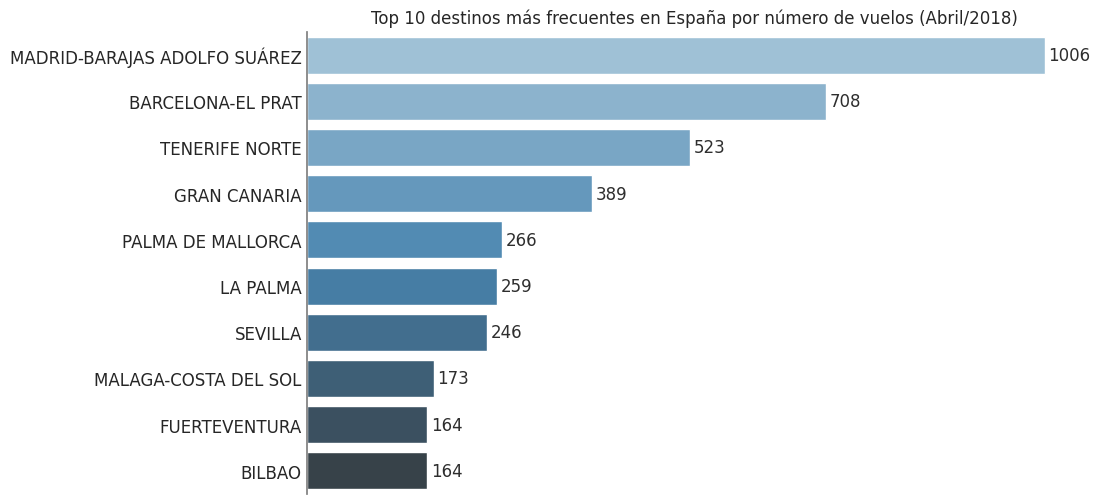

In [175]:
# Agrupar por aeropuerto de destino y contar vuelos

top_n = 10 # Indique en numero de aeropuertos que entraran en el rango

# Usamos la misma tabla agrupada
# Agrupar por aeropuerto de destino y contar vuelos
top_destinos = df_vuelos_nacionales_limpio.groupby(['arr_airport_name']).size().reset_index(name='count').sort_values('count', ascending=False)

# Filtrar los top N destinos
# We need the list of top N airport names first
top_airport_names = df_vuelos_nacionales_limpio['arr_airport_name'].value_counts().nlargest(top_n).index.tolist()

# Then filter the grouped DataFrame based on this list
df_top = top_destinos[top_destinos['arr_airport_name'].isin(top_airport_names)]


plt.figure(figsize=(10, 6))

# Crear gráfico de barras
ax = sns.barplot(data=df_top, x='count', y='arr_airport_name', palette='Blues_d')


# Graficar - Remove the second barplot call as it was causing the error
plt.title(f"Top {top_n} destinos más frecuentes en España por número de vuelos (Abril/2018)")


# Añadir valores al final de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,  # Posición X: ancho de la barra + offset
            p.get_y() + p.get_height()/2,  # Posición Y: centro de la barra
            f'{int(width)}',  # Texto
            ha='left',
            va='center',
            fontsize=12,
            color='#2e2e2e')

# Acceder a la figura completa
fig = plt.gcf()

# Ajustes de estilo del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Ocultar eje X completamente
ax.spines['left'].set_color('#808080')
ax.tick_params(axis='y', labelsize=12, length=0)  # Labels más grandes en destino
ax.tick_params(axis='x', labelsize=14)
ax.xaxis.set_visible(False)  # Oculta línea del eje y labels

# Eliminar etiquetas de ejes
plt.xlabel('')
plt.ylabel('')
plt.show()


##### Top 10 destinos internacionales más frecuentes en abril de 2018

Destinos internacionales elegidos por los españoles en abril de 2018.

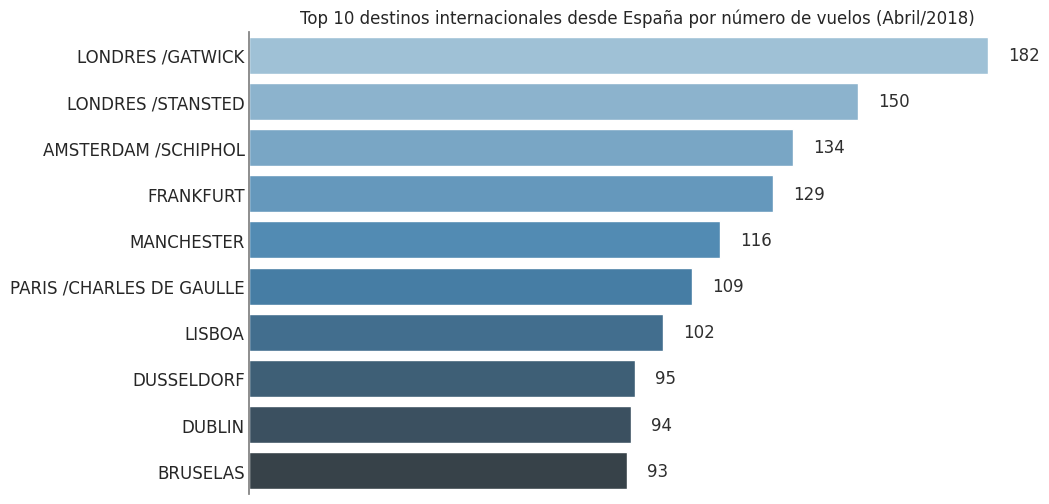

In [176]:
# Agrupar por aeropuerto de destino y contar vuelos

top_n = 10 # Indique en numero de aeropuertos que entraran en el rango

# Usamos la misma tabla agrupada
# Agrupar por aeropuerto de destino y contar vuelos
top_destinos = df_vuelos_salida_limpio.groupby(['arr_airport_name']).size().reset_index(name='count').sort_values('count', ascending=False)

# Filtrar los top N destinos
# We need the list of top N airport names first
top_airport_names = df_vuelos_salida_limpio['arr_airport_name'].value_counts().nlargest(top_n).index.tolist()

# Then filter the grouped DataFrame based on this list
df_top = top_destinos[top_destinos['arr_airport_name'].isin(top_airport_names)]


plt.figure(figsize=(10, 6))

# Crear gráfico de barras
ax = sns.barplot(data=df_top, x='count', y='arr_airport_name', palette='Blues_d')


# Graficar - Remove the second barplot call as it was causing the error
plt.title(f"Top {top_n} destinos internacionales desde España por número de vuelos (Abril/2018)")


# Añadir valores al final de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,  # Posición X: ancho de la barra + offset
            p.get_y() + p.get_height()/2,  # Posición Y: centro de la barra
            f'{int(width)}',  # Texto
            ha='left',
            va='center',
            fontsize=12,
            color='#2e2e2e')

# Acceder a la figura completa
fig = plt.gcf()

# Ajustes de estilo del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Ocultar eje X completamente
ax.spines['left'].set_color('#808080')
ax.tick_params(axis='y', labelsize=12, length=0)  # Labels más grandes en destino
ax.tick_params(axis='x', labelsize=14)
ax.xaxis.set_visible(False)  # Oculta línea del eje y labels

# Eliminar etiquetas de ejes
plt.xlabel('')
plt.ylabel('')
plt.show()

##### Tendencia por hora del día (vuelos que llegan)
- Responde: ¿A qué horas llegan más vuelos?
- Se extrae la hora desde arr_date_time y se cuenta el número total por hora.

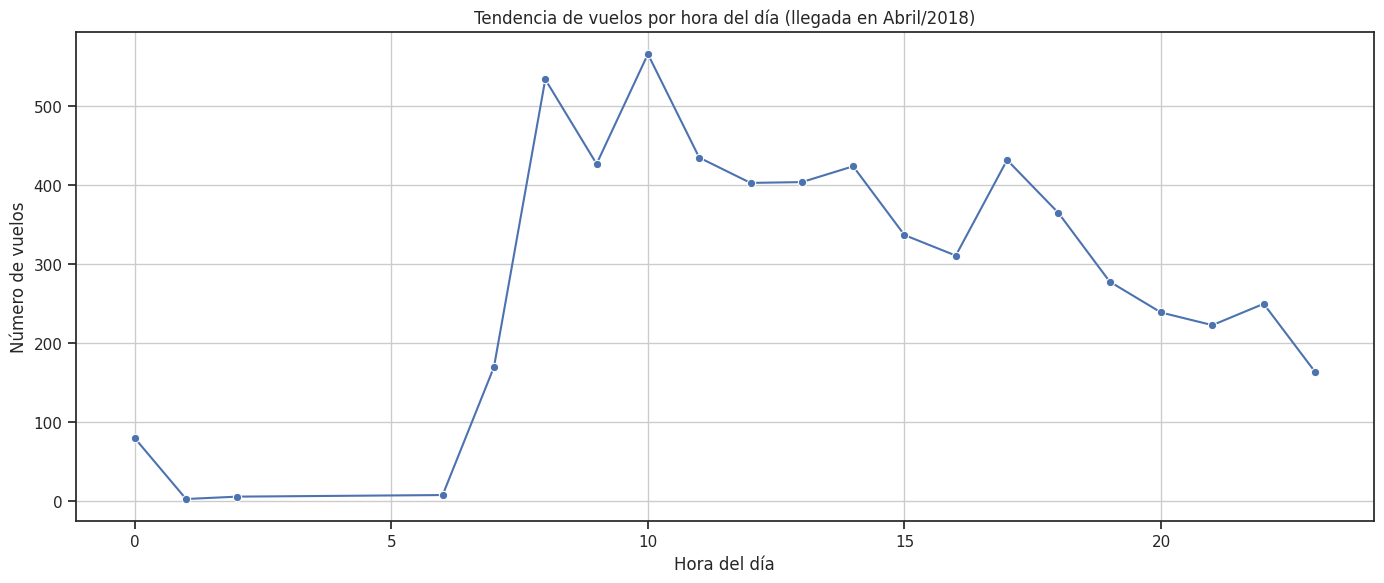

In [177]:
# Tendencia por hora del día (llegada) en Abril/2018: Vuelos nacionales + vuelos internacionales
df_hora = pd.concat([df_vuelos_nacionales_limpio, df_vuelos_llegada_limpio])
df_hora['hora_llegada'] = df_hora['arr_date_time'].dt.hour

df_hora_count = df_hora.groupby('hora_llegada').size().reset_index(name='n_vuelos')

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_hora_count, x='hora_llegada', y='n_vuelos', marker='o')
plt.title('Tendencia de vuelos por hora del día (llegada en Abril/2018)')
plt.xlabel('Hora del día')
plt.ylabel('Número de vuelos')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Tendencia por día de la semana (vuelos que llegan)**
- Responde: ¿Qué días de la semana hay más vuelos llegando?
- Se usa arr_date_time para obtener el nombre del día de la semana.

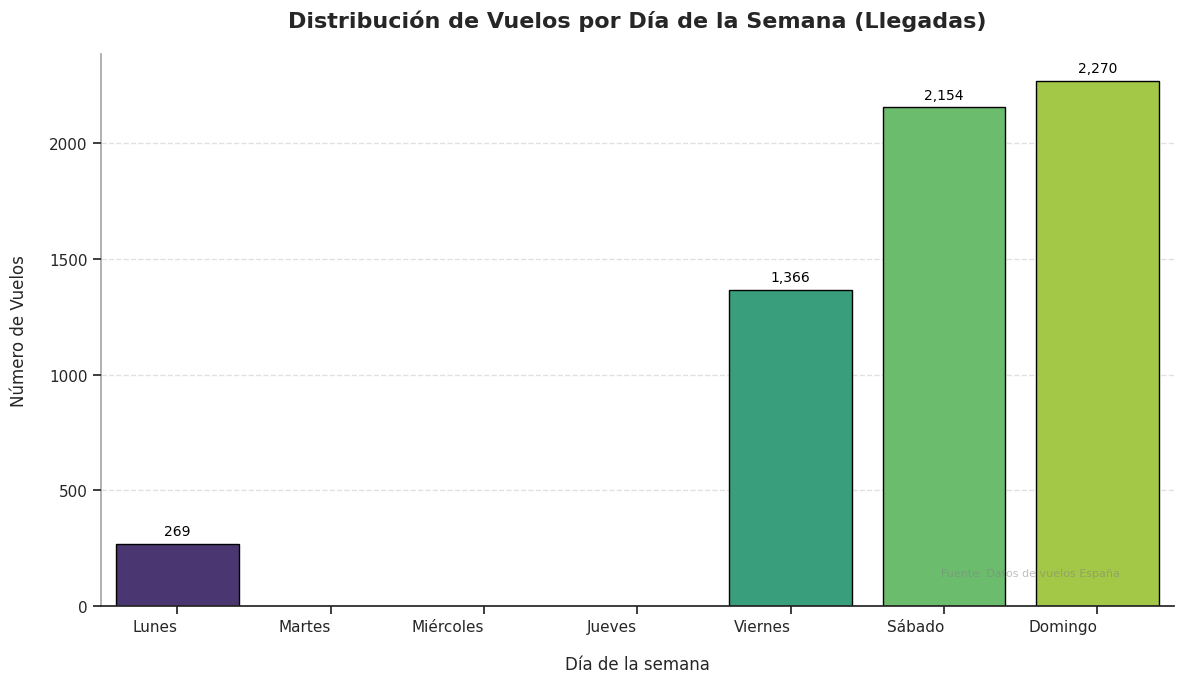

In [178]:
# Tendencia por día de la semana (llegada) - Versión mejorada
plt.figure(figsize=(12, 7))

# Diccionario de traducción y orden
dias_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

orden_dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Procesamiento de datos (Vuelos Nacionales y Vuelos Internacionales (solo llegadas))
df_semana = pd.concat([df_vuelos_nacionales_limpio, df_vuelos_llegada_limpio])
df_semana['dia_semana'] = df_semana['arr_date_time'].dt.day_name().map(dias_espanol)
conteo_dias = df_semana['dia_semana'].value_counts().reindex(orden_dias_es).reset_index()
conteo_dias.columns = ['dia_semana', 'n_vuelos']

# Creación del gráfico
ax = sns.barplot(
    data=conteo_dias,
    x='dia_semana',
    y='n_vuelos',
    palette='viridis',
    edgecolor='black',
    linewidth=1
)

# Personalización avanzada
plt.title('Distribución de Vuelos por Día de la Semana (Llegadas)',
         fontsize=16,
         fontweight='bold',
         pad=20)

plt.xlabel('Día de la semana', fontsize=12, labelpad=15)
plt.ylabel('Número de Vuelos', fontsize=12, labelpad=15)

# Añadir valores en las barras
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                color='black')

# Mejorar grid y ejes
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)

# Rotación de etiquetas y formato final
# plt.xticks(fontsize=11, rotation=30, ha='right')
plt.xticks(fontsize=11, ha='right')
plt.tight_layout()

# Añadir marca de agua institucional
plt.text(0.95, 0.05, 'Fuente: Datos de vuelos España',
        transform=ax.transAxes,
        ha='right', va='bottom',
        color='gray', alpha=0.5,
        fontsize=8)

plt.show()

##### **Gráfico de Línea: Tendencia por día de la semana (vuelos que llegan)**

In [179]:
# Versión corregida del procesamiento de datos
# ---------------------------------------------------------------
dias_espanol = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Procesamiento de datos (Vuelos Nacionales y Vuelos Internacionales (solo llegadas))
# Crear DataFrame con TODOS los días, incluso con 0 vuelos
df_semana = pd.concat([df_vuelos_nacionales_limpio, df_vuelos_llegada_limpio])
df_semana['dia_semana'] = (
    df_semana['arr_date_time']
    .dt.day_name()
    .map({
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    })
)

# Forzar la inclusión de todos los días usando Categorical
df_semana['dia_semana'] = pd.Categorical(
    df_semana['dia_semana'],
    categories=dias_espanol,
    ordered=True
)

conteo_dias = (
    df_semana.groupby('dia_semana', observed=False)
    .size()
    .reindex(dias_espanol, fill_value=0)
    .reset_index()
)
conteo_dias.columns = ['dia_semana', 'n_vuelos']



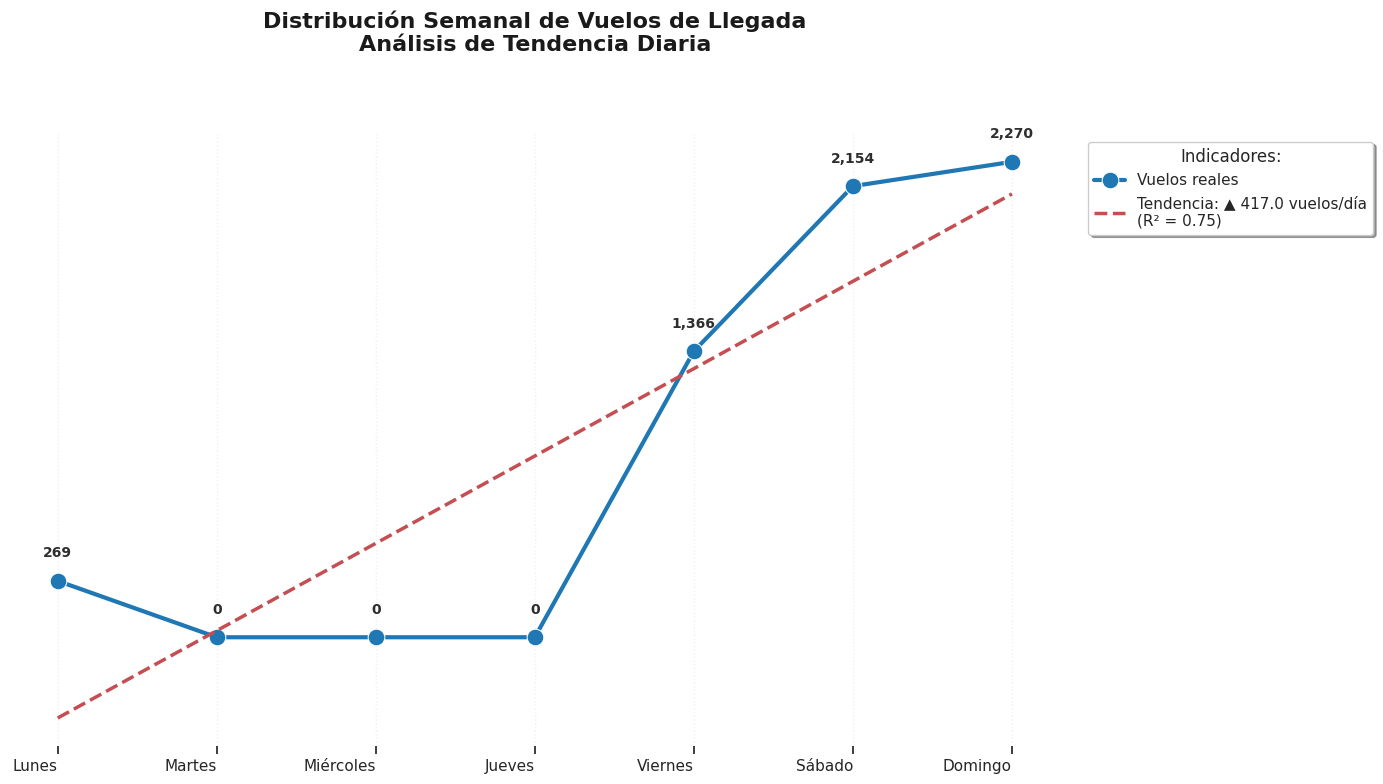

In [180]:
# Gráfica de Línea

# 1. Configurar figura primero
plt.figure(figsize=(14, 8))


# 2. Crear gráfico base
ax = sns.lineplot(
    data=conteo_dias,
    x='dia_semana',
    y='n_vuelos',
    marker='o',
    markersize=12,
    linewidth=3,
    color='#1f77b4', # color='#2e2e2e'
    label='Vuelos reales'
)

# Convertir días de la semana a valores numéricos para la regresión
dias_numericos = range(len(conteo_dias))
n_vuelos = conteo_dias['n_vuelos'].values

# Calcular regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(dias_numericos, n_vuelos)
linea_tendencia = intercept + slope * np.array(dias_numericos)


# 3. Calcular y añadir tendencia
x = range(len(conteo_dias))


# Línea de tendencia mejorada
ax.plot(dias_numericos,
        linea_tendencia,
        'r--',
        linewidth=2.5,
        label=f'Tendencia: {"▲" if slope > 0 else "▼"} {abs(slope):.1f} vuelos/día\n(R² = {r_value**2:.2f})')

# 4. Personalizar título y ejes
plt.title(
    "Distribución Semanal de Vuelos de Llegada\nAnálisis de Tendencia Diaria",
    fontsize=16,
    pad=60,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    color='#1a1a1a'
)


# 5. Ajustes finales
# plt.xticks(ticks=x, labels=conteo_dias['dia_semana'], rotation=30, ha='right')
plt.xticks(ticks=x, labels=conteo_dias['dia_semana'], ha='right')
# plt.ylabel('Número de Vuelos', fontsize=12)
# plt.xlabel('Día de la Semana', fontsize=12)
# Solo líneas horizontales en el grid
#plt.grid(axis='y', linestyle='--', alpha=0.3)
# Cuadrícula sutil para contexto
ax.grid(axis='both', linestyle=':', alpha=0.3)

# Solo líneas verticales en el grid
# plt.grid(axis='x', linestyle='--', alpha=0.5)
#plt.legend(title='Leyenda:', frameon=False, bbox_to_anchor=(1, 0.8))

plt.legend(title='Indicadores:',
          frameon=True,
          facecolor='white',
          loc='upper left',          # Punto de anclaje de la leyenda
          bbox_to_anchor=(1.02, 1),  # Posición relativa (derecha del gráfico)
          borderaxespad=0.5,         # Espacio entre leyenda y eje
          shadow=True                # Sombra para mejor legibilidad
        )

# Eliminar TODAS las etiquetas y marcas de los ejes
#ax.set_xticks([])
ax.set_yticks([])

# Quitar etiqueta del eje X
plt.xlabel('')
# Quitar etiqueta por defecto del eje Y
plt.ylabel('')



# 4. Añadir valores en los puntos (versión corregida)
for index, row in conteo_dias.iterrows():
    ax.text(
        index,  # Usar el índice categórico real
        row['n_vuelos'] + 98,  # Offset vertical de 5 unidades
        f"{row['n_vuelos']:,}",  # Formato con separadores de miles
        ha='center',
        va='bottom',
        fontsize=10,
        color='#2e2e2e',
        fontweight='bold'
    )



# Marco del gráfico
sns.despine(left=True, bottom=True)
# sns.despine()
plt.tight_layout()
plt.show()

##### **Evolución diaria de vuelos por aeropuerto de llegada (Matriz de calor)**

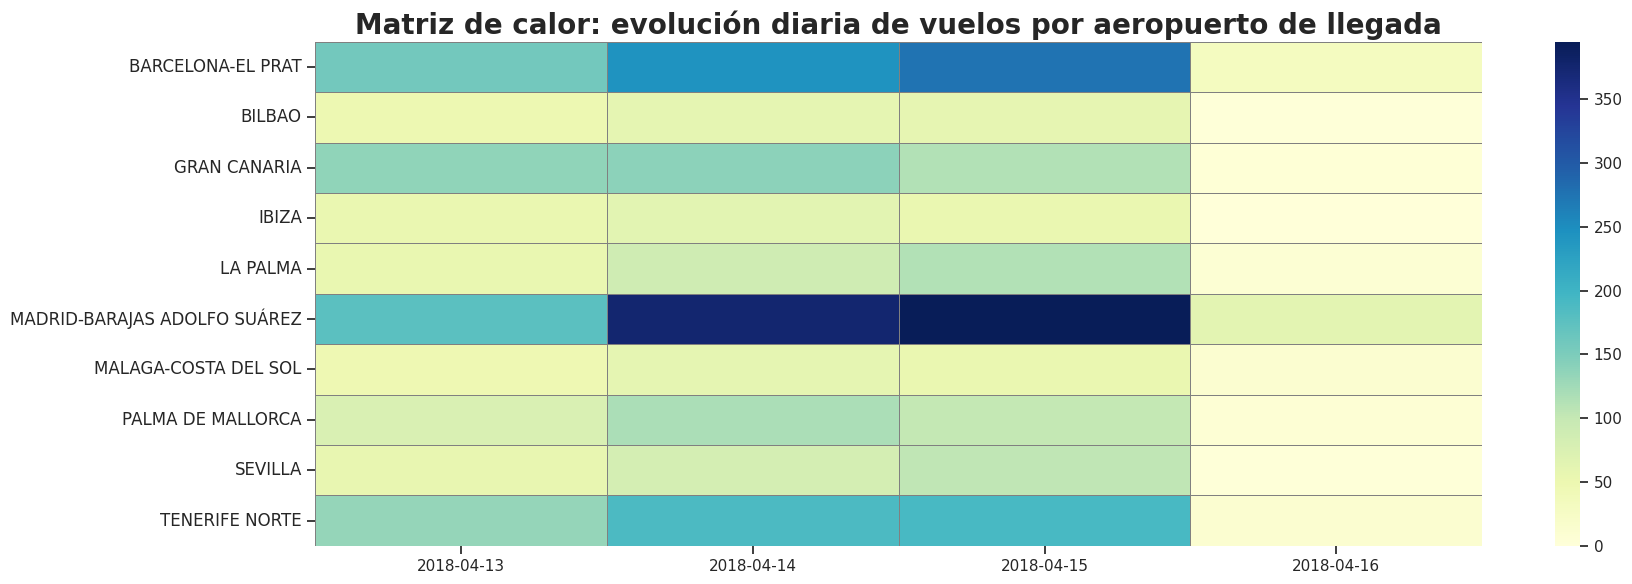

In [181]:
# Se visualiza todos los destinos a la vez, viendo patrones y picos visuales. Permite detectar anomalías o patrones de forma clara

# Creamos una tabla tipo pivot con fechas como columnas y aeropuertos como filas
destinos_nacionales_internacionales = pd.concat([popularidad_destino, popularidad_destino_internacional])
heatmap_data = popularidad_destino.pivot_table(
    index='arr_airport_name',
    columns='arr_date',
    values='n_vuelos',
    fill_value=0
)

plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title("Matriz de calor: evolución diaria de vuelos por aeropuerto de llegada", fontsize=20, fontweight='bold')
plt.xlabel("")
plt.ylabel("")
#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### Mapa Sankey básico: Origen (España) → Destino (internacional)

📝 Notas:
- Este gráfico muestra cuántos vuelos realiza cada compañía aérea (company) hacia cada aeropuerto de destino (arr_airport_name).

✈️ Sankey: Aeropuerto de salida → Aeropuerto de llegada

In [182]:
# Top destinos
top_n = 15
df_exterior = df_vuelos_salida_limpio[~df_vuelos_salida_limpio['arr_airport_name'].isin(
    df_vuelos_salida_limpio['dep_airport_name'].unique())]

df_top = df_exterior[df_exterior['arr_airport_name'].isin(
    df_exterior['arr_airport_name'].value_counts().nlargest(top_n).index)]

# Agrupamos
df_top['origen'] = 'España'
df_grouped = df_top.groupby(['origen', 'arr_airport_name']).size().reset_index(name='count')

# Nodos
labels = list(pd.concat([df_grouped['origen'], df_grouped['arr_airport_name']]).unique())
label_indices = {label: idx for idx, label in enumerate(labels)}

# Links
source_indices = df_grouped['origen'].map(label_indices)
target_indices = df_grouped['arr_airport_name'].map(label_indices)
values = df_grouped['count']

# Sankey básico
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=[f"{src} → {tgt}: {val} vuelos"
               for src, tgt, val in zip(df_grouped['origen'], df_grouped['arr_airport_name'], values)]
    )
)])

# Título
fig.update_layout(title_text=f"Flujo de vuelos desde España a los {top_n} aeropuertos internacionales con más vuelos",
                  font_size=12)

# Mostrar
fig.show()


Tabla Resumen

🧾 Resultado para el informe:
Puedes describir la gráfica diciendo algo como:

En la Gráfica representa el flujo de vuelos desde España hacia los 5 aeropuertos internacionales más frecuentes mediante un diagrama de Sankey. Cada enlace muestra la cantidad de vuelos entre el país de origen y cada destino.

In [183]:
# Top destinos
top_n = 5
df_exterior = df_vuelos_salida_limpio[~df_vuelos_salida_limpio['arr_airport_name'].isin(
    df_vuelos_salida_limpio['dep_airport_name'].unique())]

df_top = df_exterior[df_exterior['arr_airport_name'].isin(
    df_exterior['arr_airport_name'].value_counts().nlargest(top_n).index)]

# Agrupamos
# df_top['origen'] = 'España' # Eliminamos esta línea ya que queremos los aeropuertos de origen específicos
df_top['origen'] = df_top['dep_airport_name'] # Usamos la columna de aeropuerto de salida como origen

# Para obtener los aeropuertos de España con más vuelos de salida, primero contamos los vuelos por aeropuerto de salida en el DataFrame original (o en df_vuelos_salida_limpio)
top_origenes_esp = df_vuelos_salida_limpio['dep_airport_name'].value_counts().nlargest(top_n).index.tolist()

# Filtramos df_top para incluir solo los vuelos que salen de estos top aeropuertos de origen en España
df_top = df_top[df_top['origen'].isin(top_origenes_esp)]


df_grouped = df_top.groupby(['origen', 'arr_airport_name']).size().reset_index(name='count')

# Nodos
# Incluimos los aeropuertos de origen en los nodos
labels = list(pd.concat([df_grouped['origen'], df_grouped['arr_airport_name']]).unique())
label_indices = {label: idx for idx, label in enumerate(labels)}

# Links
source_indices = df_grouped['origen'].map(label_indices)
target_indices = df_grouped['arr_airport_name'].map(label_indices)
values = df_grouped['count']

# Sankey básico
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels # Usamos la lista de etiquetas que ahora incluye los aeropuertos de origen
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=[f"{src} → {tgt}: {val} vuelos"
               for src, tgt, val in zip(df_grouped['origen'], df_grouped['arr_airport_name'], values)]
    )
)])

# Título
fig.update_layout(title_text=f"Flujo de vuelos desde los {top_n} aeropuertos españoles con más vuelos a los {top_n} aeropuertos internacionales más frecuentes",
                  font_size=12)

# Mostrar
fig.show()

### **Exportar datasets limpios**

In [184]:
# Exportar conjunto de datos de infovuelo procesados (limpios)
# Estos datrames pueden ser usados en Tableau o PowerBI para sacarmos las graficas y tablas para análisis

df_vuelos_salida_limpio.to_csv('vuelos_internacionales_salida_limpio.csv', index=False)
df_vuelos_llegada_limpio.to_csv('vuelos_internacionales_llegada_limpio.csv', index=False)
df_vuelos_nacionales_limpio.to_csv('vuelos_nacionales_limpio.csv', index=False)

print("Limpieza completada. Los datasets (Vuelos Nacionales y Internacionales) estan limpios y preparados para el EDA")

Limpieza completada. Los datasets (Vuelos Nacionales y Internacionales) estan limpios y preparados para el EDA


## 📌 **Conclusiones**
- Resumen de criterios (magnitud y tendencia) y hallazgos (destino con mayor aumento, mayor descenso, etc.).

A partir del análisis realizado:

- Se identificaron los destinos con mayor volumen de vuelos (ej. Madrid, Barcelona, Palma de Mallorca).
- Se observan patrones de aumento o estabilidad en algunos destinos en los días analizados.


- Se utilizó el dataset de vuelos como indicador de popularidad de destinos.
- Se calculó la proporción de vuelos en el primer y último mes, y su cambio absoluto.
- Se identificó los 10 destinos con mayor participación en el último periodo y mostramos su tendencia.
- Este enfoque se puede ampliar a otros datasets turísticos (alojamientos, reseñas, etc.) para enriquecer el análisis.


Para un análisis más avanzado podrían incluirse:
- Volumen de pasajeros (si existiese en el dataset).
- Estacionalidad mensual o semanal.
- Enriquecimiento con datos externos de turismo o actividades económicas.